<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>


## Introduction


As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [6]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')


In [8]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

In [9]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [10]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [11]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [13]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [14]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [15]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [16]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to _n_cols_ since we will need this number when building our network.


In [17]:
n_cols = predictors_norm.shape[1] # number of predictors

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [18]:
import keras

As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [19]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [40]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [41]:
# build the model
model = regression_model()

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

NameError: name 'EarlyStopping' is not defined

Next, we will train and test the model at the same time using the _fit_ method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [42]:
# fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=500, verbose=1)

Epoch 1/500
23/23 [==============================] - 1s 7ms/step - loss: 1674.6688 - accuracy: 0.0000e+00 - val_loss: 1165.0199 - val_accuracy: 0.0000e+00
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 1547.6193 - accuracy: 0.0000e+00 - val_loss: 1058.3163 - val_accuracy: 0.0000e+00
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 1357.6602 - accuracy: 0.0000e+00 - val_loss: 896.7618 - val_accuracy: 0.0000e+00
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 1073.6410 - accuracy: 0.0000e+00 - val_loss: 684.9227 - val_accuracy: 0.0000e+00
Epoch 5/500
23/23 [==============================] - 0s 1ms/step - loss: 730.4128 - accuracy: 0.0000e+00 - val_loss: 454.5237 - val_accuracy: 0.0000e+00
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 429.5069 - accuracy: 0.0000e+00 - val_loss: 288.9174 - val_accuracy: 0.0000e+00
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 277

23/23 [==============================] - 0s 2ms/step - loss: 108.9956 - accuracy: 0.0000e+00 - val_loss: 157.8724 - val_accuracy: 0.0000e+00
Epoch 55/500
23/23 [==============================] - 0s 2ms/step - loss: 106.1831 - accuracy: 0.0000e+00 - val_loss: 159.1934 - val_accuracy: 0.0000e+00
Epoch 56/500
23/23 [==============================] - 0s 2ms/step - loss: 104.1286 - accuracy: 0.0000e+00 - val_loss: 156.1998 - val_accuracy: 0.0000e+00
Epoch 57/500
23/23 [==============================] - 0s 2ms/step - loss: 101.7965 - accuracy: 0.0000e+00 - val_loss: 155.0583 - val_accuracy: 0.0000e+00
Epoch 58/500
23/23 [==============================] - 0s 2ms/step - loss: 99.4329 - accuracy: 0.0000e+00 - val_loss: 150.8675 - val_accuracy: 0.0000e+00
Epoch 59/500
23/23 [==============================] - 0s 3ms/step - loss: 96.7409 - accuracy: 0.0000e+00 - val_loss: 147.4458 - val_accuracy: 0.0000e+00
Epoch 60/500
23/23 [==============================] - 0s 2ms/step - loss: 94.3130 - accurac

23/23 [==============================] - 0s 2ms/step - loss: 34.0283 - accuracy: 0.0000e+00 - val_loss: 120.9732 - val_accuracy: 0.0000e+00
Epoch 108/500
23/23 [==============================] - 0s 2ms/step - loss: 33.3562 - accuracy: 0.0000e+00 - val_loss: 107.4439 - val_accuracy: 0.0000e+00
Epoch 109/500
23/23 [==============================] - 0s 1ms/step - loss: 33.1213 - accuracy: 0.0000e+00 - val_loss: 115.4312 - val_accuracy: 0.0000e+00
Epoch 110/500
23/23 [==============================] - 0s 1ms/step - loss: 32.8411 - accuracy: 0.0000e+00 - val_loss: 109.3660 - val_accuracy: 0.0000e+00
Epoch 111/500
23/23 [==============================] - 0s 1ms/step - loss: 33.3879 - accuracy: 0.0000e+00 - val_loss: 126.1299 - val_accuracy: 0.0000e+00
Epoch 112/500
23/23 [==============================] - 0s 1ms/step - loss: 32.4607 - accuracy: 0.0000e+00 - val_loss: 115.8315 - val_accuracy: 0.0000e+00
Epoch 113/500
23/23 [==============================] - 0s 2ms/step - loss: 32.1176 - accur

23/23 [==============================] - 0s 1ms/step - loss: 23.8279 - accuracy: 0.0000e+00 - val_loss: 101.3767 - val_accuracy: 0.0000e+00
Epoch 161/500
23/23 [==============================] - 0s 1ms/step - loss: 23.4969 - accuracy: 0.0000e+00 - val_loss: 110.6086 - val_accuracy: 0.0000e+00
Epoch 162/500
23/23 [==============================] - 0s 1ms/step - loss: 23.7742 - accuracy: 0.0000e+00 - val_loss: 102.0752 - val_accuracy: 0.0000e+00
Epoch 163/500
23/23 [==============================] - 0s 1ms/step - loss: 24.2868 - accuracy: 0.0000e+00 - val_loss: 101.1643 - val_accuracy: 0.0000e+00
Epoch 164/500
23/23 [==============================] - 0s 1ms/step - loss: 23.3399 - accuracy: 0.0000e+00 - val_loss: 104.9444 - val_accuracy: 0.0000e+00
Epoch 165/500
23/23 [==============================] - 0s 2ms/step - loss: 23.2330 - accuracy: 0.0000e+00 - val_loss: 107.3397 - val_accuracy: 0.0000e+00
Epoch 166/500
23/23 [==============================] - 0s 2ms/step - loss: 22.8930 - accur

23/23 [==============================] - 0s 2ms/step - loss: 18.8114 - accuracy: 0.0000e+00 - val_loss: 113.2351 - val_accuracy: 0.0000e+00
Epoch 214/500
23/23 [==============================] - 0s 2ms/step - loss: 18.6643 - accuracy: 0.0000e+00 - val_loss: 112.4489 - val_accuracy: 0.0000e+00
Epoch 215/500
23/23 [==============================] - 0s 1ms/step - loss: 18.2997 - accuracy: 0.0000e+00 - val_loss: 99.9809 - val_accuracy: 0.0000e+00
Epoch 216/500
23/23 [==============================] - 0s 2ms/step - loss: 17.9925 - accuracy: 0.0000e+00 - val_loss: 103.0446 - val_accuracy: 0.0000e+00
Epoch 217/500
23/23 [==============================] - 0s 1ms/step - loss: 18.1282 - accuracy: 0.0000e+00 - val_loss: 112.6273 - val_accuracy: 0.0000e+00
Epoch 218/500
23/23 [==============================] - 0s 2ms/step - loss: 18.3686 - accuracy: 0.0000e+00 - val_loss: 116.7124 - val_accuracy: 0.0000e+00
Epoch 219/500
23/23 [==============================] - 0s 1ms/step - loss: 17.9195 - accura

23/23 [==============================] - 0s 2ms/step - loss: 14.9556 - accuracy: 0.0000e+00 - val_loss: 97.8042 - val_accuracy: 0.0000e+00
Epoch 267/500
23/23 [==============================] - 0s 2ms/step - loss: 15.4169 - accuracy: 0.0000e+00 - val_loss: 101.7086 - val_accuracy: 0.0000e+00
Epoch 268/500
23/23 [==============================] - 0s 2ms/step - loss: 14.9109 - accuracy: 0.0000e+00 - val_loss: 105.7884 - val_accuracy: 0.0000e+00
Epoch 269/500
23/23 [==============================] - 0s 2ms/step - loss: 15.1119 - accuracy: 0.0000e+00 - val_loss: 105.2250 - val_accuracy: 0.0000e+00
Epoch 270/500
23/23 [==============================] - 0s 2ms/step - loss: 14.7843 - accuracy: 0.0000e+00 - val_loss: 106.3841 - val_accuracy: 0.0000e+00
Epoch 271/500
23/23 [==============================] - 0s 1ms/step - loss: 15.0072 - accuracy: 0.0000e+00 - val_loss: 105.1464 - val_accuracy: 0.0000e+00
Epoch 272/500
23/23 [==============================] - 0s 1ms/step - loss: 15.7179 - accura

23/23 [==============================] - 0s 2ms/step - loss: 13.8695 - accuracy: 0.0000e+00 - val_loss: 79.9253 - val_accuracy: 0.0000e+00
Epoch 320/500
23/23 [==============================] - 0s 2ms/step - loss: 13.4786 - accuracy: 0.0000e+00 - val_loss: 89.9571 - val_accuracy: 0.0000e+00
Epoch 321/500
23/23 [==============================] - 0s 2ms/step - loss: 13.2060 - accuracy: 0.0000e+00 - val_loss: 94.9701 - val_accuracy: 0.0000e+00
Epoch 322/500
23/23 [==============================] - 0s 2ms/step - loss: 13.4775 - accuracy: 0.0000e+00 - val_loss: 105.4269 - val_accuracy: 0.0000e+00
Epoch 323/500
23/23 [==============================] - 0s 2ms/step - loss: 13.0004 - accuracy: 0.0000e+00 - val_loss: 83.7643 - val_accuracy: 0.0000e+00
Epoch 324/500
23/23 [==============================] - 0s 2ms/step - loss: 13.3608 - accuracy: 0.0000e+00 - val_loss: 105.9107 - val_accuracy: 0.0000e+00
Epoch 325/500
23/23 [==============================] - 0s 2ms/step - loss: 13.4727 - accuracy:

23/23 [==============================] - 0s 2ms/step - loss: 12.4150 - accuracy: 0.0000e+00 - val_loss: 85.7920 - val_accuracy: 0.0000e+00
Epoch 373/500
23/23 [==============================] - 0s 2ms/step - loss: 11.9573 - accuracy: 0.0000e+00 - val_loss: 81.8780 - val_accuracy: 0.0000e+00
Epoch 374/500
23/23 [==============================] - 0s 2ms/step - loss: 11.8959 - accuracy: 0.0000e+00 - val_loss: 87.3498 - val_accuracy: 0.0000e+00
Epoch 375/500
23/23 [==============================] - 0s 1ms/step - loss: 11.7553 - accuracy: 0.0000e+00 - val_loss: 89.4948 - val_accuracy: 0.0000e+00
Epoch 376/500
23/23 [==============================] - 0s 1ms/step - loss: 11.8082 - accuracy: 0.0000e+00 - val_loss: 84.8232 - val_accuracy: 0.0000e+00
Epoch 377/500
23/23 [==============================] - 0s 1ms/step - loss: 11.6058 - accuracy: 0.0000e+00 - val_loss: 87.3266 - val_accuracy: 0.0000e+00
Epoch 378/500
23/23 [==============================] - 0s 2ms/step - loss: 11.6732 - accuracy: 0

23/23 [==============================] - 0s 2ms/step - loss: 11.2512 - accuracy: 0.0000e+00 - val_loss: 94.3332 - val_accuracy: 0.0000e+00
Epoch 426/500
23/23 [==============================] - 0s 2ms/step - loss: 11.1210 - accuracy: 0.0000e+00 - val_loss: 78.6297 - val_accuracy: 0.0000e+00
Epoch 427/500
23/23 [==============================] - 0s 2ms/step - loss: 11.0771 - accuracy: 0.0000e+00 - val_loss: 91.1900 - val_accuracy: 0.0000e+00
Epoch 428/500
23/23 [==============================] - 0s 2ms/step - loss: 11.1559 - accuracy: 0.0000e+00 - val_loss: 81.9093 - val_accuracy: 0.0000e+00
Epoch 429/500
23/23 [==============================] - 0s 2ms/step - loss: 11.0560 - accuracy: 0.0000e+00 - val_loss: 80.6873 - val_accuracy: 0.0000e+00
Epoch 430/500
23/23 [==============================] - 0s 1ms/step - loss: 11.0394 - accuracy: 0.0000e+00 - val_loss: 78.1221 - val_accuracy: 0.0000e+00
Epoch 431/500
23/23 [==============================] - 0s 1ms/step - loss: 12.0171 - accuracy: 0

23/23 [==============================] - 0s 2ms/step - loss: 10.7741 - accuracy: 0.0000e+00 - val_loss: 81.3764 - val_accuracy: 0.0000e+00
Epoch 479/500
23/23 [==============================] - 0s 2ms/step - loss: 10.0464 - accuracy: 0.0000e+00 - val_loss: 89.6045 - val_accuracy: 0.0000e+00
Epoch 480/500
23/23 [==============================] - 0s 2ms/step - loss: 10.2283 - accuracy: 0.0000e+00 - val_loss: 79.8767 - val_accuracy: 0.0000e+00
Epoch 481/500
23/23 [==============================] - 0s 1ms/step - loss: 10.0890 - accuracy: 0.0000e+00 - val_loss: 84.2915 - val_accuracy: 0.0000e+00
Epoch 482/500
23/23 [==============================] - 0s 2ms/step - loss: 10.3313 - accuracy: 0.0000e+00 - val_loss: 93.2101 - val_accuracy: 0.0000e+00
Epoch 483/500
23/23 [==============================] - 0s 2ms/step - loss: 9.9390 - accuracy: 0.0000e+00 - val_loss: 83.0360 - val_accuracy: 0.0000e+00
Epoch 484/500
23/23 [==============================] - 0s 2ms/step - loss: 10.9482 - accuracy: 0.

In [24]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [29]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

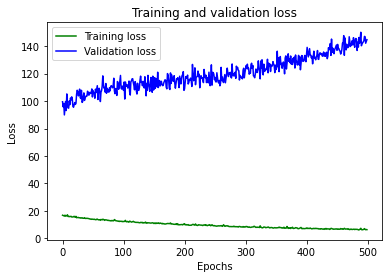

In [36]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(0,500)
plt.plot(epochs, loss_train,'g', label = "Training loss")
plt.plot(epochs, loss_val,'b', label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


<strong>You can refer to this [link](https://keras.io/models/sequential?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) to learn about other functions that you can use for prediction or evaluation.</strong>


Feel free to vary the following and note what impact each change has on the model's performance:

1.  Increase or decreate number of neurons in hidden layers
2.  Add more hidden layers
3.  Increase number of epochs


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called _Introduction to Deep Learning & Neural Networks with Keras_. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB1).


<hr>

Copyright © 2019 [IBM Developer Skills Network](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
